In [2]:
#Installing Library
!pip install mlxtend

In [3]:
# Importing Required Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import mlxtend
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing Dataset in collab environment
df=pd.read_excel ('/content/Online retail.xlsx',sheet_name='Sheet1',header=None,)

pg=df[0].str.split(',',expand=True)


In [5]:
#Dataset Overview
pg.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7498,chicken,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7499,escalope,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [6]:
pg.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,chutney,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,turkey,avocado,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,mineral water,milk,energy bar,whole wheat rice,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [7]:
# Dataset description
pg.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [8]:
# Data set Info
pg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [9]:
#Dataset rows and columns
pg.shape

(7501, 20)

In [10]:
print(f"Total Number of Rows {pg.shape[0]}")
print(f"Total Number of Columns {pg.shape[1]}")

Total Number of Rows 7501
Total Number of Columns 20


In [11]:
# checkind duplicated value
pg.duplicated().sum()

2325

In [12]:
# checking Null values
pg.isnull().sum()

,0
0,0
1,1754
2,3112
3,4156
4,4972
5,5637
6,6132
7,6520
8,6847
9,7106


<Axes: >

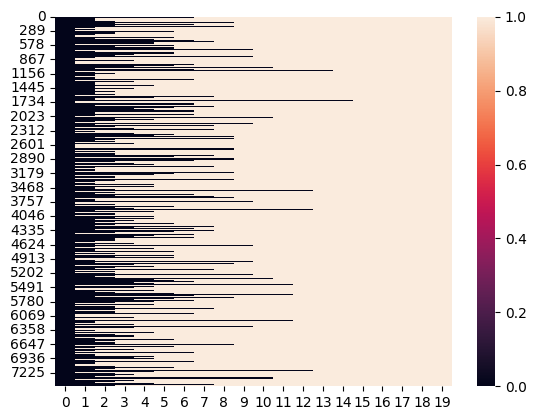

In [13]:
# Null values visulaization
sns.heatmap(pg.isnull())

# Pre-Processing

In [15]:
# Normalize data
df=pd.get_dummies(pg)

In [16]:
#Dataset after normalizatin
df.head()

,0_almonds,0_antioxydant juice,0_asparagus,0_avocado,0_babies food,0_bacon,0_barbecue sauce,0_black tea,0_blueberries,0_body spray,...,16_antioxydant juice,16_french fries,16_frozen smoothie,17_frozen smoothie,17_protein bar,17_spinach,18_cereals,18_mayonnaise,18_spinach,19_olive oil
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Apriori Algorithm

In [24]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)#df-dataframe, min_support default=0.5
frequent_itemsets

,support,itemsets
0,0.076790,(0_burgers)
1,0.013065,(0_cake)
2,0.052126,(0_chocolate)
3,0.035995,(0_cookies)
4,0.037195,(0_eggs)
...,...,...
84,0.010265,"(0_shrimp, 1_frozen vegetables)"
85,0.013332,"(1_mineral water, 0_spaghetti)"
86,0.011865,"(2_spaghetti, 1_ground beef)"
87,0.017731,"(2_mineral water, 1_spaghetti)"


In [27]:
rules = association_rules(frequent_itemsets, metric="lift",num_itemsets=7501, min_threshold=0.7) # min_threshold is Confidence
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
8,(2_spaghetti),(3_mineral water),0.037195,0.026796,0.012798,0.344086,12.840743,1.0,0.011802,1.483737,0.957746,0.250000,0.326026,0.410849
9,(3_mineral water),(2_spaghetti),0.026796,0.037195,0.012798,0.477612,12.840743,1.0,0.011802,1.843084,0.947513,0.250000,0.457431,0.410849
4,(2_spaghetti),(1_ground beef),0.037195,0.038795,0.011865,0.318996,8.222653,1.0,0.010422,1.411454,0.912318,0.185031,0.291511,0.312419
5,(1_ground beef),(2_spaghetti),0.038795,0.037195,0.011865,0.305842,8.222653,1.0,0.010422,1.387011,0.913837,0.185031,0.279025,0.312419
0,(0_shrimp),(1_frozen vegetables),0.043328,0.031196,0.010265,0.236923,7.594701,1.0,0.008914,1.269602,0.907656,0.159751,0.212352,0.282991
1,(1_frozen vegetables),(0_shrimp),0.031196,0.043328,0.010265,0.329060,7.594701,1.0,0.008914,1.425868,0.896290,0.159751,0.298673,0.282991
6,(2_mineral water),(1_spaghetti),0.049993,0.054793,0.017731,0.354667,6.472882,1.0,0.014992,1.464681,0.890004,0.203675,0.317257,0.339134
7,(1_spaghetti),(2_mineral water),0.054793,0.049993,0.017731,0.323601,6.472882,1.0,0.014992,1.404506,0.894523,0.203675,0.288006,0.339134
2,(1_mineral water),(0_spaghetti),0.064525,0.047194,0.013332,0.206612,4.377947,1.0,0.010286,1.200933,0.824803,0.135501,0.167314,0.244549
3,(0_spaghetti),(1_mineral water),0.047194,0.064525,0.013332,0.282486,4.377947,1.0,0.010286,1.303773,0.809800,0.135501,0.232995,0.244549


In [28]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(0_shrimp),(1_frozen vegetables),0.043328,0.031196,0.010265,0.236923,7.594701,1.0,0.008914,1.269602,0.907656,0.159751,0.212352,0.282991
1,(1_frozen vegetables),(0_shrimp),0.031196,0.043328,0.010265,0.329060,7.594701,1.0,0.008914,1.425868,0.896290,0.159751,0.298673,0.282991
2,(1_mineral water),(0_spaghetti),0.064525,0.047194,0.013332,0.206612,4.377947,1.0,0.010286,1.200933,0.824803,0.135501,0.167314,0.244549
3,(0_spaghetti),(1_mineral water),0.047194,0.064525,0.013332,0.282486,4.377947,1.0,0.010286,1.303773,0.809800,0.135501,0.232995,0.244549
4,(2_spaghetti),(1_ground beef),0.037195,0.038795,0.011865,0.318996,8.222653,1.0,0.010422,1.411454,0.912318,0.185031,0.291511,0.312419
5,(1_ground beef),(2_spaghetti),0.038795,0.037195,0.011865,0.305842,8.222653,1.0,0.010422,1.387011,0.913837,0.185031,0.279025,0.312419
6,(2_mineral water),(1_spaghetti),0.049993,0.054793,0.017731,0.354667,6.472882,1.0,0.014992,1.464681,0.890004,0.203675,0.317257,0.339134
7,(1_spaghetti),(2_mineral water),0.054793,0.049993,0.017731,0.323601,6.472882,1.0,0.014992,1.404506,0.894523,0.203675,0.288006,0.339134
8,(2_spaghetti),(3_mineral water),0.037195,0.026796,0.012798,0.344086,12.840743,1.0,0.011802,1.483737,0.957746,0.250000,0.326026,0.410849
9,(3_mineral water),(2_spaghetti),0.026796,0.037195,0.012798,0.477612,12.840743,1.0,0.011802,1.843084,0.947513,0.250000,0.457431,0.410849


## Analysis and Interpretation

*  Key matics
1. Support : Support shows the how many time given product apeear in given data set.
2. Confidance:  It quantifies how often the items in the consequent of a rule (the "then" part) are purchased. basically the pair of same item appear in data set.
3. Lift: lift is quantity which give the how itams are closely bought together.
its ratio of confidance to the support
* rules with high confidence and lift. These often represent strong and meaningful associations.
* Groupping complementry item such as milk~bread,milk~ceral

* Insights
1. In rules i got 2 combination of same item as  (0_shrimp),	(1_frozen vegetables) and (1_frozen vegetables) ,(0_shrimp)  for the 1st combination confidance is 23% and 32% respectively and the lift for both is 7.59.
so as for 2nd combination i.e (1_frozen vegetables) ,(0_shrimp)  have more confidance than other so

 **Customer who baught (1_frozen vegetables) item are more likely baught (0_shrimp)**

2. similarly In rules i got 2 combination of same item as  (3_mineral water)	(2_spaghetti) and (2_spaghetti)  ,(3_mineral water)  for the 1st combination confidance is 47% and 23% respectively and the lift for both is 12.80.
so as for 2nd combination i.e (3_mineral water)	(2_spaghetti)  have more confidance than other So

 **Customer who baught (3_mineral water) item are more likely baught (2_spaghetti)**

3.  similarly In rules i got 2 combination of same item as  (2_spaghetti)	(1_ground beef)	 and (1_ground beef)  ,(2_spaghetti) for the 1st combination confidance is 31% and 31% respectively and the lift for both is 8.20.
so as for 2nd combination i.e (2_spaghetti)	(1_ground beef)	 have more confidance than other So

 **Customer who baught (2_spaghetti) item are more likely baught (1_ground beef)**

 This are the few most importaint insight  got from associaltion rule / market basket analysis.





---



---



1.	What is lift and why is it important in Association rules?

Ans:

 Lift is quantity which give the how itams are closely bought together. its ratio of confidance to the support.
 * if the value of lift is > 1 then the antecedents and consequents are closely realated to each other.
 i.e if some one buy item which antecedents then most propably he also buy item which consequents.
 *  If value of lift is equal to 1  then both itam i.e antecedents consequents are indpendent to each other,  there are least chance to buy together.
 * if lift value is less than 1 then the antecedents and consequents are closely independent to each other, there is no chance to buy together.


2.	What is support and Confidence. How do you calculate them?

Ans:

Support shows the how many time given product apeear in given data set.
it can be calulate by

its Ratio of total occurance of antecedents and consequent in record  to the total number of record

Confidance: It quantifies how often the items in the consequent of a rule (the "then" part) are purchased. basically the pair of same item appear in data set.
it can be calulate by

its ratio of support of antecedents consequent to the suppor of antecedents


3.	What are some limitations or challenges of Association rules mining?

 * The rule may be affect if there is some occasion or festival going on, customer baught frequent iteam which is most probably used in respective festival.

 Eg. In diwali festival most people bought diyas with oil in that period of time its shows strong anticedents and consequent but for other day no one bought this two item together.

 * all the model is dependent on min support and min thershold as we change any one value then its affect all values.

 Overall market basket analysis is most useful for daily basis days for shopping mall, store to increase revenue and stocking.

